In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
Here = Path.cwd()
from scipy.optimize import minimize

# Сбор статистики

### 100-1200 базовое

In [2]:
DIR = Sim_res / 'Ising' / 'TrIs_Res' / 'energy'
if DIR.exists():
    dataset = list(DIR.glob('BC*.txt'))
    #print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [3]:
def collect(dataset, full_data=None, sort=False):
    for d in dataset:
        data = pd.read_csv(d, sep=' ', index_col=False)
        if full_data is None:
            full_data = data
        else:
            full_data = pd.concat([full_data, data], ignore_index=True)
    if sort:
        full_data.sort_values(by=['J', 'N'], inplace=True, ignore_index=True)
    return full_data

data = collect(dataset, sort=True)

### крит-зона

In [4]:
DIR = Sim_res / 'Ising' / 'TrIs_crit' / 'energy'
dataset = list(DIR.glob('BC*.txt'))
#print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [5]:
data = collect(dataset, data, True)

### Проверка 

In [6]:
data.head(5)

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,Unnamed: 19
0,100,0.0,0,929,35,96.8226,0.057610,-0.000050,0.000199,0.024398,0.000035,0.001924,7.501960e-06,0.079668,0.000060,0.010019,0.000013,0.000299,9.058660e-07,105200000000
1,300,0.0,0,4910,73,486.1900,0.358418,-0.000024,0.000089,0.006794,0.000010,0.000143,4.982520e-07,0.046045,0.000051,0.003335,0.000006,0.000033,1.204110e-07,105900000000
2,600,0.0,0,13924,120,1354.8600,1.132870,-0.000006,0.000035,0.003129,0.000002,0.000030,5.030990e-08,0.032560,0.000014,0.001667,0.000001,0.000008,1.528970e-08,482200000000
3,1200,0.0,0,39380,225,0.0000,NaN,0.000042,0.000053,0.001468,0.000002,0.000007,2.123840e-08,0.023018,0.000023,0.000833,0.000002,0.000002,7.588310e-09,373770000000
4,100,0.1,0,925,33,96.3550,0.068653,-0.163649,0.000179,0.055868,0.000100,0.008602,4.158540e-05,0.093606,0.000074,0.013780,0.000021,0.000562,1.830520e-06,95900000000


In [7]:
data.rename(columns={'Unnamed: 19': 'steps'}, inplace=True)

In [8]:
data.to_csv(Here / 'CSVs' / 'IsingISAW_Tri_energy.csv', index=False)

# Графики

In [3]:
data = pd.read_csv(Here / 'CSVs' / 'IsingISAW_Tri_energy.csv')
data.head(5)

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,steps
0,100,0.0,0,929,35,96.8226,0.057610,-0.000050,0.000199,0.024398,0.000035,0.001924,7.501960e-06,0.079668,0.000060,0.010019,0.000013,0.000299,9.058660e-07,105200000000
1,300,0.0,0,4910,73,486.1900,0.358418,-0.000024,0.000089,0.006794,0.000010,0.000143,4.982520e-07,0.046045,0.000051,0.003335,0.000006,0.000033,1.204110e-07,105900000000
2,600,0.0,0,13924,120,1354.8600,1.132870,-0.000006,0.000035,0.003129,0.000002,0.000030,5.030990e-08,0.032560,0.000014,0.001667,0.000001,0.000008,1.528970e-08,482200000000
3,1200,0.0,0,39380,225,0.0000,NaN,0.000042,0.000053,0.001468,0.000002,0.000007,2.123840e-08,0.023018,0.000023,0.000833,0.000002,0.000002,7.588310e-09,373770000000
4,100,0.1,0,925,33,96.3550,0.068653,-0.163649,0.000179,0.055868,0.000100,0.008602,4.158540e-05,0.093606,0.000074,0.013780,0.000021,0.000562,1.830520e-06,95900000000


In [10]:
data.steps.describe()

count    2.120000e+02
mean     2.112667e+11
std      1.339786e+11
min      2.362000e+10
25%      6.235000e+10
50%      2.167200e+11
75%      3.419125e+11
max      5.022000e+11
Name: steps, dtype: float64

### $\langle e \rangle / J$

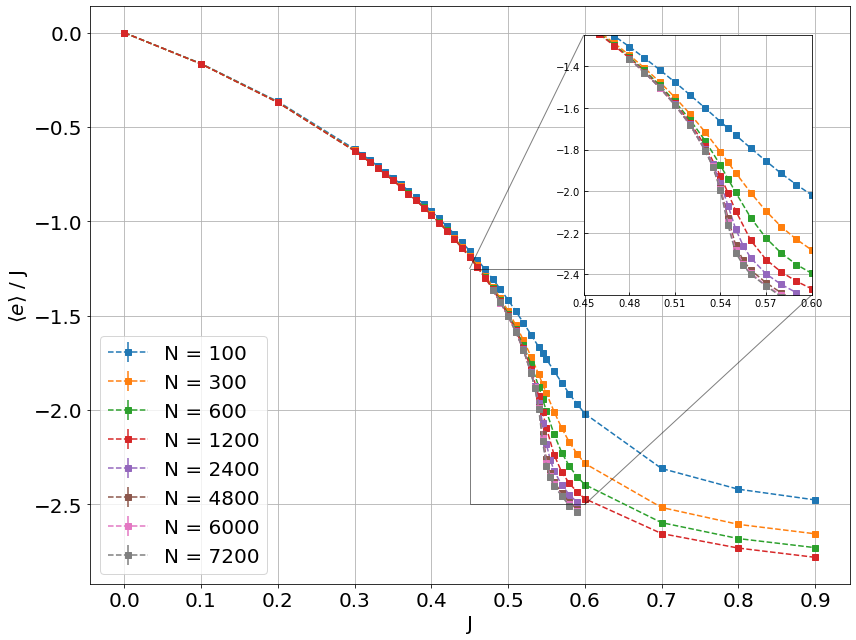

In [11]:
x = 'J'
y_name = 'mean_e'
ye_name = 'err_mean_e'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[(data.N == n)]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
    
axins=ax.inset_axes([0.65, 0.5, 0.3, 0.45])
for n in Ns:
    dataN = data[(data.N == n) & (data.J > 0)]
    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
x1, x2, y1, y2 = 0.45, 0.6, -2.5, -1.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks(np.linspace(x1, x2, 6))
axins.tick_params(direction='in')
axins.grid()
#axins.set_xticklabels([])
#axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black", label='')


plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle e \rangle$ / J', fontsize=20)
plt.legend(loc=3, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_E.png')

### $\langle m^{2} \rangle$

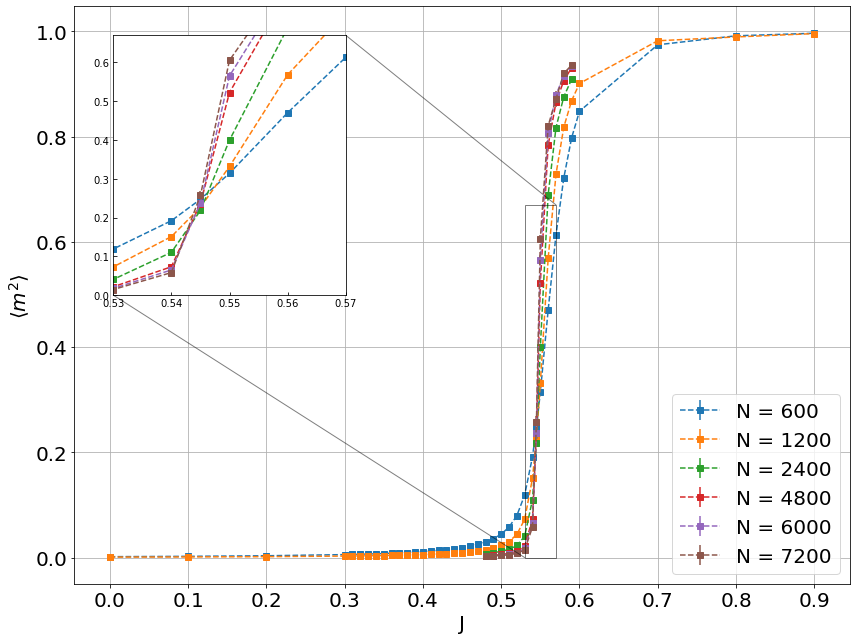

In [64]:
x = 'J'
y_name = 'mean_m_sq'
ye_name = 'err_mean_m_sq'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
Ns=Ns[Ns > 300]
for n in Ns:
    dataN = data[data.N == n]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')

axins=ax.inset_axes([0.05, 0.5, 0.3, 0.45])
for n in Ns:
    dataN = data[data.N == n]
    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
x1, x2, y1, y2 = 0.532, 0.568, 0., 0.67
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks(np.linspace(round(x1, 2), round(x2,2), 5))
axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black", label='')

plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle m^2 \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_m2.png')

### Генерация ошибок для кумулянта

In [12]:
data['err_mean_m_sq']

0      0.000013
1      0.000006
2      0.000001
3      0.000002
4      0.000021
         ...   
207    0.004577
208    0.000048
209    0.000016
210    0.000005
211    0.001797
Name: err_mean_m_sq, Length: 212, dtype: float64

In [13]:
U4 = 1 - data['mean_m_fourth'] / (3 * data['mean_m_sq'] ** 2)

In [14]:
def predict_error(m4, m4_err, m2, m2_err, length=1000):
    m4_arr = np.random.normal(m4, m4_err, length)
    m2_arr = np.random.normal(m2, m2_err, length)
    U4 = 1 - m4_arr / (3 * m2_arr ** 2)
    return U4.std()

err_U4 = data.apply(lambda x: predict_error(x['mean_m_fourth'], x['err_mean_m_fourth'], x['mean_m_sq'], x['err_mean_m_sq']), axis=1)

In [15]:
data['U4'] = U4
data['err_U4'] = err_U4

In [16]:
data[data.N == 7200]['err_U4']

91     0.013731
99     0.014379
107    0.022625
115    0.017320
123    0.020654
131    0.030125
135    0.044875
143    0.110284
151    0.057777
159    0.011621
163    0.005681
171    0.003731
179    0.014166
187    0.000444
195    0.002457
Name: err_U4, dtype: float64

### $\langle U^{4} \rangle$

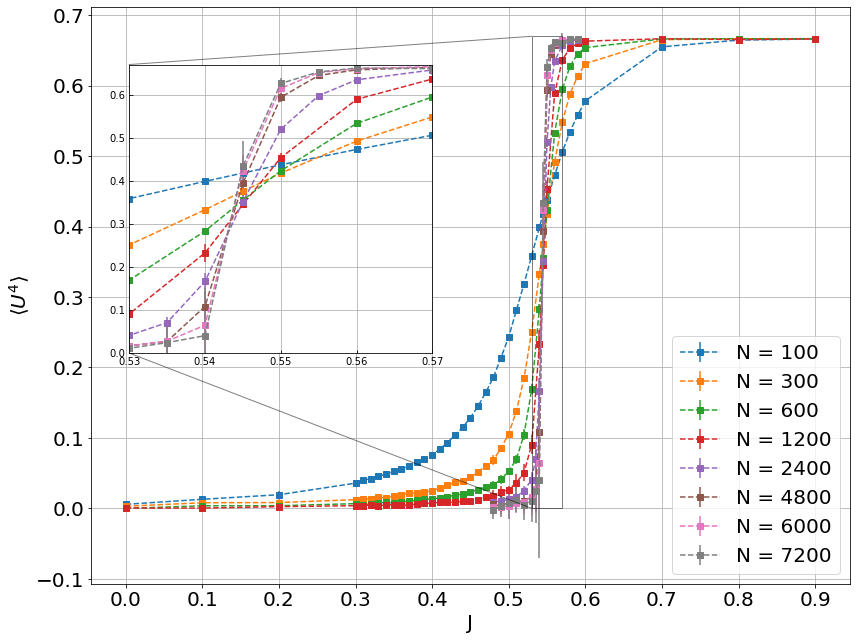

In [17]:
x = 'J'
y_name = 'U4'
ye_name = 'err_U4'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[data.N == n]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')

axins=ax.inset_axes([0.05, 0.4, 0.4, 0.5])
for n in Ns:
    dataN = data[data.N == n]
    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
x1, x2, y1, y2 = 0.532, 0.568, 0., 0.67
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks(np.unique(np.round(np.linspace(x1, x2, 6),2)))
axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
axins.grid()
ax.indicate_inset_zoom(axins, edgecolor="black", label='')


plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle U^4 \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_U4.png')

### $R^2(N)$

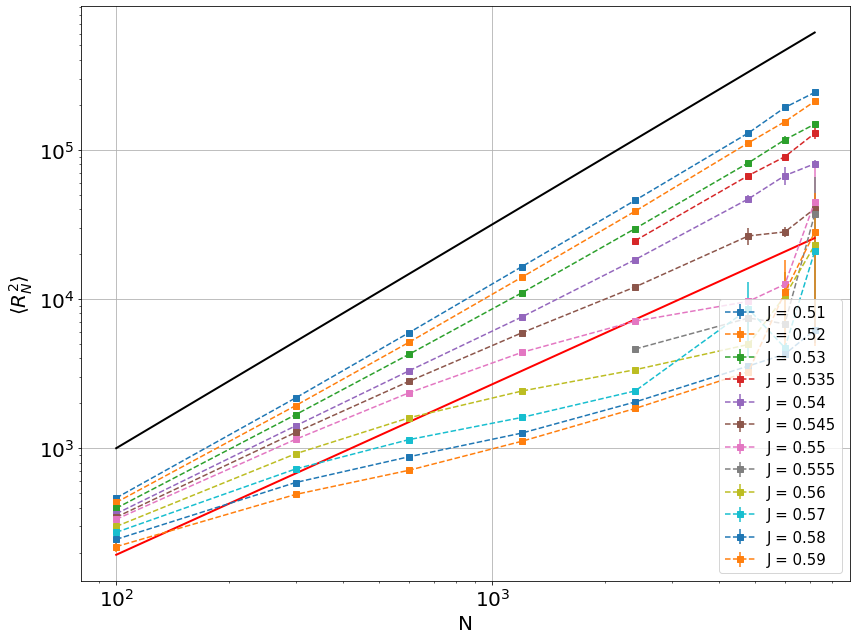

In [18]:
x = 'N'
y_name = 'mean_R_sq'
ye_name = 'err_mean_R_sq'

fig, ax = plt.subplots(figsize=(12,9))
Js = data[(data.J > 0.5) & (data.J < 0.6)].J.unique()
Ns = data.N.unique()
for j in Js:
    dataN = data[data.J == j]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'J = {j}')

plt.xlabel('N', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.plot(Ns, Ns ** (2 * 3/4), 'k-', linewidth=2)
plt.plot(Ns, Ns ** (2 * 4/7), 'r-', linewidth=2)
plt.ylabel(r'$\langle R^2_N \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_R2log.png')

### $R^{2} / N^{2\nu}$

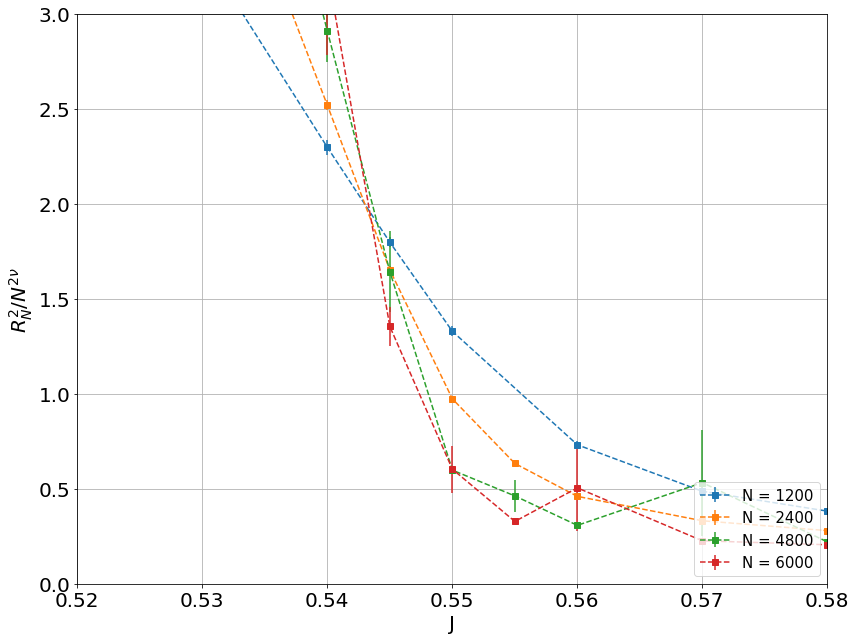

In [7]:
x = 'N'
y_name = 'mean_R_sq'
ye_name = 'err_mean_R_sq'
nu = 4/7

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for N in Ns[(Ns > 1000) & (Ns < 7200)]:
    dataN = data[data.N == N]
    ax.errorbar(dataN['J'], y=dataN[y_name]/(N ** (2 * nu)), yerr=dataN[ye_name]/(N ** (2 * nu)), fmt='s--', label=f'N = {N}')

plt.xlim(0.52, 0.58)
plt.ylim(0,3)
plt.xlabel('J', fontsize=20)
plt.ylabel(r'$R^2_N / N^{2\nu}$', fontsize=20)
plt.legend(loc=4, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_R2toN2v.png')

# Распределения

In [46]:
DIR = Sim_res / 'Ising' / 'TrIs_crit' / 'counts'
dataset = list(DIR.glob('Counts_M*7200*.txt'))
print(*list(map(lambda x: x.name, dataset)), sep='\n')
N=7200

Counts_M_Ising_triangle 0.480000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.490000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.500000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.510000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.520000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.530000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.540000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.545000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.550000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.560000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.570000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.580000_0.000000_7200in7205.txt
Counts_M_Ising_triangle 0.590000_0.000000_7200in7205.txt


In [47]:
def collect_hist(dataset):
    full_data=[]
    Js = []
    for d in dataset:
        J = np.loadtxt(d, skiprows=1, max_rows=1)[1]
        Js.append(J)
        
        data = np.loadtxt(d, skiprows=2).T
        full_data.append(data)
        
    return Js, full_data

data = collect_hist(dataset[5:-4])

In [48]:
data[0]

[0.53, 0.54, 0.545, 0.55]

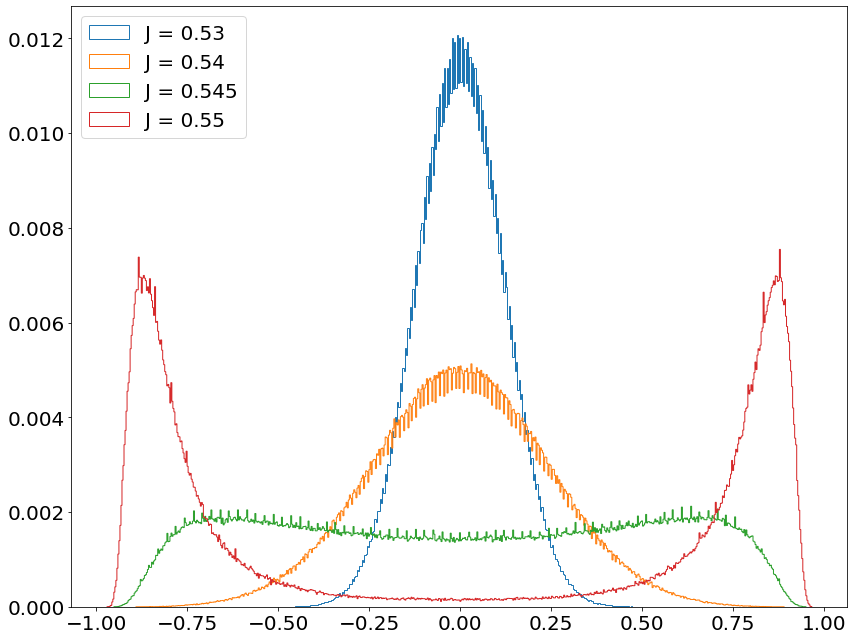

In [50]:
fig, ax = plt.subplots(figsize=(12,9))
for J, d in zip(*data):
    plt.hist(d[0]/N, bins=len(d[0])//10, weights=d[1]/d[1].sum(), histtype='step', label=f'J = {J}')
plt.legend(fontsize=20)
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_m2_distr.png')

# Коллапс данных

### $R^2$

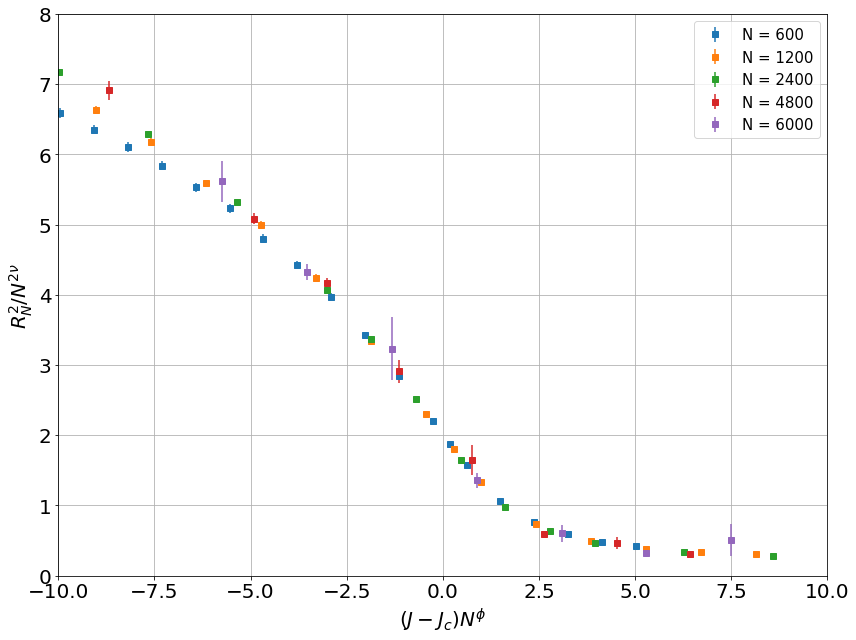

In [13]:
x = 'N'
y_name = 'mean_R_sq'
ye_name = 'err_mean_R_sq'
nu = 4/7
fi = 0.7
J_c = 0.543

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
Ns = Ns[(Ns > 500) & (Ns < 7200)]
for N in Ns:
    dataN = data[data.N == N]
    ax.errorbar((dataN['J'] - J_c)*(N ** fi), y=dataN[y_name]/(N ** (2 * nu)), yerr=dataN[ye_name]/(N ** (2 * nu)), fmt='s', label=f'N = {N}')

plt.xlim(-10, 10)
plt.ylim(0,8)
plt.xlabel(r'$(J-J_c)N^{\phi}$', fontsize=20)
plt.ylabel(r'$R^2_N / N^{2\nu}$', fontsize=20)
plt.legend(loc=1, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_R2_datcoll.png')

### $m^2$

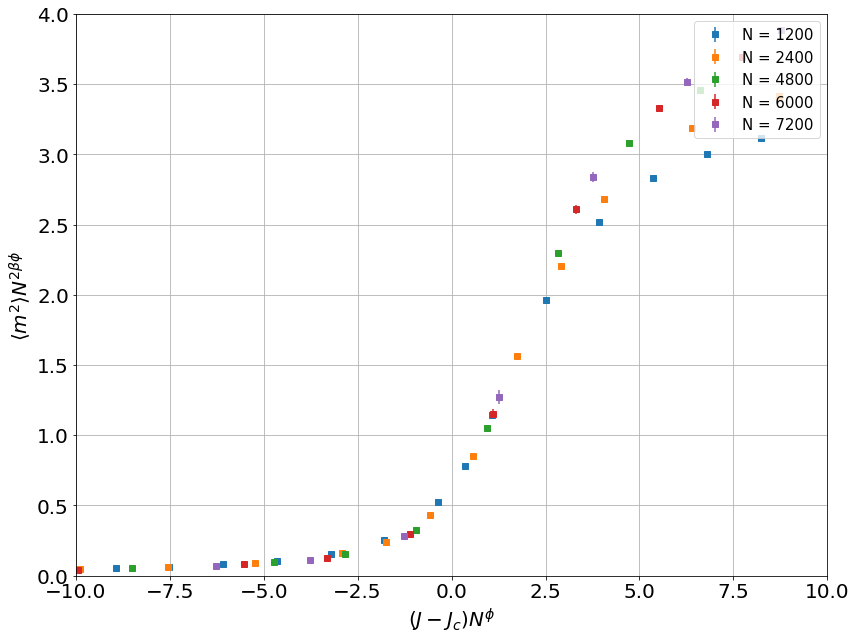

In [19]:
x = 'N'
y_name = 'mean_m_sq'
ye_name = 'err_mean_m_sq'
beta = 1/8
fi = 0.7
J_c = 0.5425

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for N in Ns[(Ns > 1000)]:# & (Ns < 7200)]:
    dataN = data[data.N == N]
    ax.errorbar((dataN['J'] - J_c)*(N ** fi), y=dataN[y_name] * (N ** (2 * beta * fi)), yerr=dataN[ye_name] * (N ** (2 * beta * fi)), fmt='s', label=f'N = {N}')

plt.xlim(-10, 10)
plt.ylim(0,4)
plt.xlabel(r'$(J-J_c)N^{\phi}$', fontsize=20)
plt.ylabel(r'$\langle m^2 \rangle N^{2\beta \phi}$', fontsize=20)
plt.legend(loc=1, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_m2_datcoll.png')